Atalov S.

### Fundamentals of Machine Learning and Artificial Intelligence

## Lab 1. kNN (5 points)

-----


# Part 1: Calculating Euclidean Distance

In this practice exercise, you will work on calculating the Euclidean distance between two points in multi-dimensional space. Euclidean distance is a fundamental concept in various fields, including machine learning, data analysis, and geometry.

## Task 1: Implement the `euclidean_distance` Function

You need to create a Python function named `euclidean_distance` that takes two numpy arrays as input, representing the coordinates of two points in multi-dimensional space. The function should calculate and return the Euclidean distance between these two points.

**Instructions:**

1. Implement the `euclidean_distance` function.
2. Ensure that the function can handle points with different numbers of dimensions. If the two input points have different dimensions, raise a `ValueError`.
3. Use numpy for efficient mathematical operations.
4. Return the Euclidean distance as a float.

In [ ]:
import numpy as np

In [185]:
def euclidean_distance(point1, point2):
    """
    Calculate the Euclidean distance between two points in multi-dimensional space.

    Args:
    point1 (numpy.ndarray): The coordinates of the first point.
    point2 (numpy.ndarray): The coordinates of the second point.

    Returns:
    float: The Euclidean distance between the two points.
    """
    
    if np.shape(point1) != np.shape(point2):
        raise ValueError("Points must have the same number of dimensions")
    
    
    # write your solution
    euclidean_dist = np.linalg.norm(point1 -point2)
    return euclidean_dist

## Task 2: Test Your Function

Test the `euclidean_distance` function with multiple test cases to ensure its correctness. Make sure to compare the calculated distances with the expected values.

In [ ]:
# Test case 1: Euclidean distance in 2D space
point1_2d = np.array([1, 2])
point2_2d = np.array([4, 6])
expected_distance_2d = 5.0
calculated_distance_2d = euclidean_distance(point1_2d, point2_2d)
assert np.isclose(calculated_distance_2d, expected_distance_2d), "Test case 1 failed"

# Test case 2: Euclidean distance in 3D space
point1_3d = np.array([1, 2, 3])
point2_3d = np.array([4, 6, 9])
expected_distance_3d = 7.81024
calculated_distance_3d = euclidean_distance(point1_3d, point2_3d)
assert np.isclose(calculated_distance_3d, expected_distance_3d), "Test case 2 failed"

print("All test cases passed.")

Understanding how to calculate Euclidean distance is essential for various applications in data analysis, machine learning. This practice exercise will help reinforce your understanding of this concept.

---
# Part 2: Implementing k-Nearest Neighbors (kNN) Classifier

In this practice exercise, you will implement a k-Nearest Neighbors (kNN) classifier in Python. kNN is a simple but powerful algorithm used for classification tasks in machine learning. Follow the instructions below to complete the implementation.

## Task 1: Implement the kNN Classifier

You will need to complete the implementation of the kNN classifier using the structured outline provided. This includes defining the `__init__`, `fit`, `predict` methods.

**Instructions:**

1. Use the structured outline provided in the code to define the kNN classifier class, including constructor and methods.
2. Add comments and docstrings to explain the purpose of each method and its input arguments.
3. Implement the logic for calculating distances, selecting k-nearest neighbors, and making predictions based on majority voting.


In [ ]:
import numpy as np

In [192]:
import numpy as np

class KNNClassifier:
    def __init__(self, k=3):
        """
        Constructor for the KNNClassifier class.

        Args:
        k (int): Number of neighbors to consider (default is 3).
        """
        self.k = k

    def fit(self, X_train, y_train):
        """
        Train the kNN classifier with the provided training data.

        Args:
        X_train (numpy.ndarray): Training feature vectors.
        y_train (numpy.ndarray): Training labels.
        """
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        """
        Predict class labels for a given set of test data.

        Args:
        X_test (numpy.ndarray): Test feature vectors.

        Returns:
        numpy.ndarray: Predicted class labels for each test data point.
        """
        return self._predict(X_test)

    def _predict(self, x):
        #от x до всех точек
        distances = np.array([euclidean_distance(x,i) for i in self.X_train])
        
        # получаем индексы ближайших k точек
        k_indices = np.argsort(distances)[:self.k]
        
        # получаем значения ближайших k
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        # большинство
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

    def score(self, X_test, y_test):
        """
        Calculate the accuracy of the classifier on a test dataset.

        Args:
        X_test (numpy.ndarray): Test feature vectors.
        y_test (numpy.ndarray): True labels for the test data.

        Returns:
        float: Accuracy of the classifier.
        """
        predictions = self.predict(X_test)
        
        accuracy = np.mean(predictions == y_test)
        return accuracy

## Task 2: Test Your kNN Classifier

After implementing the kNN classifier, you need to test it with various datasets to ensure its correctness.

In [193]:
X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4]])
y_train = np.array([0, 0, 1, 1])
X_test = np.array([[3.5, 3.5], [0, 0]])

In [194]:
model = KNNClassifier(k=2)

In [195]:
model.fit(X_train, y_train)

In [196]:
model.predict(X_test) == np.array([1, 0])

ValueError: Points must have the same number of dimensions

## Task 3: Visualize your kNN Classifier

In [180]:
# DO NOT CHANGE GIVEN CODE BELOW!

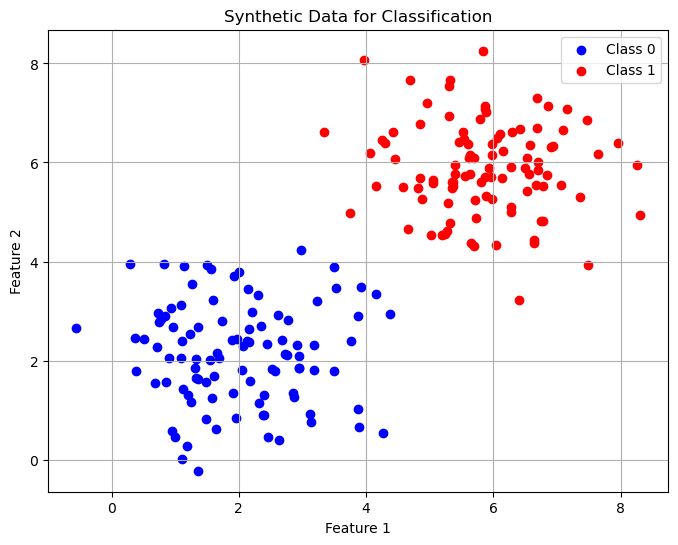

In [181]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate random data points for two classes
def generate_data():
    np.random.seed(0)
    # Class 0: Random points around (2, 2)
    class_0 = np.random.randn(100, 2) + np.array([2, 2])
    
    # Class 1: Random points around (6, 6)
    class_1 = np.random.randn(100, 2) + np.array([6, 6])
    
    # Combine both classes
    data = np.vstack([class_0, class_1])
    labels = np.array([0] * 100 + [1] * 100)  # Class labels (0 for class 0, 1 for class 1)
    
    return data, labels

# Generate random data
X, y = generate_data()

# Plot the generated data points
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Synthetic Data for Classification')
plt.grid()
plt.show()

In [182]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [183]:
# Create and train the kNN classifier
knn = KNNClassifier(k=5)
knn.fit(X_train, y_train)

In [184]:

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy:.2f}")

# Plot the decision boundary
def plot_decision_boundary(clf, X, y, cmap='viridis'):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolor='k')

# Plot decision boundary
plt.figure(figsize=(8, 6))
plot_decision_boundary(knn, X_train, y_train)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('kNN Decision Boundary')
plt.grid()
plt.show()


Accuracy: 0.52


ValueError: cannot reshape array of size 1 into shape (525,543)

<Figure size 800x600 with 0 Axes>

## Conclusion

Implementing the k-Nearest Neighbors (kNN) classifier is a valuable exercise to gain a deeper understanding of this algorithm. Completing this practice exercise will help solidify your knowledge of kNN and its practical implementation.